In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

# Import NumPy, Pandas, Matplotlib, Seaborn libraries libraries

In [2]:
import warnings

warnings.filterwarnings('ignore')

# Suppress the warnings

Link to the dataset:

https://data.cso.ie/table/PEA11



In [3]:
missing_values = ['/',' ','-','--','na','Na','n/a','NA','n.a.','?','nan','Nan','nul','Nul','null','Null']

df= pd.read_csv('PopulationEstimatesDatabase1.csv',na_values=missing_values)

# Create a list with all the possible missing value formats. Create a name for the dataframe as report
# ('PopulationEstimatesDatabase1')and apply the pd.read_csv function 
# Include the variable 'na_values' and define it with the 'missing values' list previously created

In [4]:
df.isnull().sum()

# Check missing values by applying the .isnull().sum method to the dataframe

STATISTIC Label       0
Year                  0
Single Year of Age    0
Sex                   0
UNIT                  0
VALUE                 0
dtype: int64

In [5]:
df.info()

# Check the information of the dataframe by applying the .info() function

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11817 entries, 0 to 11816
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   STATISTIC Label     11817 non-null  object
 1   Year                11817 non-null  int64 
 2   Single Year of Age  11817 non-null  object
 3   Sex                 11817 non-null  object
 4   UNIT                11817 non-null  object
 5   VALUE               11817 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 554.1+ KB


In [6]:
df.head(5)

# Print the first 5 rows of the dataframe by applying the.head() function

,STATISTIC Label,Year,Single Year of Age,Sex,UNIT,VALUE
0,Population estimates from 1926,1926,All ages,Both sexes,Number,2971992
1,Population estimates from 1926,1926,All ages,Male,Number,1506889
2,Population estimates from 1926,1926,All ages,Female,Number,1465103
3,Population estimates from 1926,1926,Under 1 year,Both sexes,Number,55391
4,Population estimates from 1926,1926,Under 1 year,Male,Number,28084


In [7]:
df.tail(5)

# Print the last 5 rows of the dataframe by applying the .tail() function

,STATISTIC Label,Year,Single Year of Age,Sex,UNIT,VALUE
11812,Population estimates from 1926,2023,98 years,Male,Number,197
11813,Population estimates from 1926,2023,98 years,Female,Number,632
11814,Population estimates from 1926,2023,99 years and over,Both sexes,Number,1600
11815,Population estimates from 1926,2023,99 years and over,Male,Number,352
11816,Population estimates from 1926,2023,99 years and over,Female,Number,1248


In [8]:
df.shape

# The number of rows and columns of the dataframe by applying the .shape function

(11817, 6)

This dataframe contains 11817 rows and 6 columns

In [9]:
df.dtypes

# The data types of the dataframe by applying the .dtypes attribute to the dataframe

STATISTIC Label       object
Year                   int64
Single Year of Age    object
Sex                   object
UNIT                  object
VALUE                  int64
dtype: object

In [10]:
df.columns

# Check the column names of the dataframe by applying the .columns attribute

Index(['STATISTIC Label', 'Year', 'Single Year of Age', 'Sex', 'UNIT',
       'VALUE'],
      dtype='object')

In [11]:
df.drop(columns=["STATISTIC Label", "UNIT"], inplace=True)

# Apply .drop() to remove the spesific column as it contains the same index values

In [12]:
df.head(5)

,Year,Single Year of Age,Sex,VALUE
0,1926,All ages,Both sexes,2971992
1,1926,All ages,Male,1506889
2,1926,All ages,Female,1465103
3,1926,Under 1 year,Both sexes,55391
4,1926,Under 1 year,Male,28084


In [13]:
df = df.rename(columns={'Single Year of Age': 'Single_Year_of_Age','VALUE': 'Value'})

# To correct only the "VALUE" spelling in columns-Rename the columns of the dataframe by applying the .rename() method,
# spaces between words in column names have been replaced by "_" in order to Other columns are suitable.

In [14]:
df.head(5)

,Year,Single_Year_of_Age,Sex,Value
0,1926,All ages,Both sexes,2971992
1,1926,All ages,Male,1506889
2,1926,All ages,Female,1465103
3,1926,Under 1 year,Both sexes,55391
4,1926,Under 1 year,Male,28084


In [15]:
df.describe(include = "object")

,Single_Year_of_Age,Sex
count,11817,11817
unique,101,3
top,All ages,Both sexes
freq,117,3939


In [16]:
l_encoder = LabelEncoder()

# Put the type of all data of object type into the same shape (float).with the Encoder function.

In [17]:
df["Sex_Encoded"] = l_encoder.fit_transform(df["Sex"])

In [18]:
df["Single_Year_of_Age_Encoded"] = l_encoder.fit_transform(df["Single_Year_of_Age"])

In [19]:
df.head(100)

,Year,Single_Year_of_Age,Sex,Value,Sex_Encoded,Single_Year_of_Age_Encoded
0,1926,All ages,Both sexes,2971992,0,99
1,1926,All ages,Male,1506889,2,99
2,1926,All ages,Female,1465103,1,99
3,1926,Under 1 year,Both sexes,55391,0,100
4,1926,Under 1 year,Male,28084,2,100
...,...,...,...,...,...,...
95,1926,30 years,Female,27357,1,23
96,1926,31 years,Both sexes,28054,0,24
97,1926,31 years,Male,14666,2,24
98,1926,31 years,Female,13388,1,24


In [20]:
df.head()

,Year,Single_Year_of_Age,Sex,Value,Sex_Encoded,Single_Year_of_Age_Encoded
0,1926,All ages,Both sexes,2971992,0,99
1,1926,All ages,Male,1506889,2,99
2,1926,All ages,Female,1465103,1,99
3,1926,Under 1 year,Both sexes,55391,0,100
4,1926,Under 1 year,Male,28084,2,100


In [21]:
df.drop(columns=["Single_Year_of_Age", "Sex"], inplace=True)

In [22]:
df.head(10)

,Year,Value,Sex_Encoded,Single_Year_of_Age_Encoded
0,1926,2971992,0,99
1,1926,1506889,2,99
2,1926,1465103,1,99
3,1926,55391,0,100
4,1926,28084,2,100
5,1926,27307,1,100
6,1926,55876,0,0
7,1926,28374,2,0
8,1926,27502,1,0
9,1926,58273,0,11


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11817 entries, 0 to 11816
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Year                        11817 non-null  int64
 1   Value                       11817 non-null  int64
 2   Sex_Encoded                 11817 non-null  int32
 3   Single_Year_of_Age_Encoded  11817 non-null  int32
dtypes: int32(2), int64(2)
memory usage: 277.1 KB


In [24]:
df.shape

(11817, 4)

In [25]:
len(df)

11817

In [26]:
df.describe().T

# Apply .describe().T to check the mean, standard deviation, and quantiles of all the columns in the nh dataframe

,count,mean,std,min,25%,50%,75%,max
Year,11817.0,1996.410256,24.463165,1926.0,1986.0,2004.0,2014.0,2023.0
Value,11817.0,53524.614708,286775.372374,6.0,12427.0,26675.0,35577.0,5281612.0
Sex_Encoded,11817.0,1.000000,0.816531,0.0,0.0,1.0,2.0,2.0
Single_Year_of_Age_Encoded,11817.0,50.000000,29.155993,0.0,25.0,50.0,75.0,100.0


Year vary from 1926 to 2023. Value vary from 6 to 5.281.612 with a mean of 53.524,61 and a standard deviation of 286.775,37 which means this shows that the range is very large. We can say that we need to do a prediction success test in order to say that we have enough prediction information to make a successful prediction.

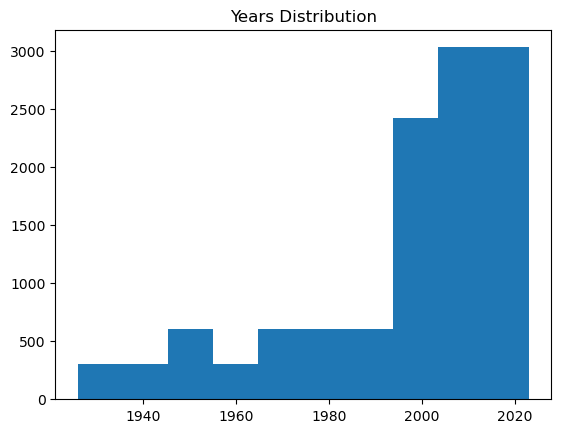

In [84]:
plt.hist(df['Year'])

plt.title('Years Distribution')

plt.show()

# Plot a histogram to determine the units distribution by applying plt.hist()
# title by applying plt.title()
# the histogram by applying plt.show()


In [82]:
from scipy import stats

Value = df['Value']

sample_mean = np.mean(Value)
sample_std = np.std(Value, ddof=1) 
n = len(Value)

confidence_level = 0.95
alpha = 1 - confidence_level

margin_of_error = stats.t.ppf(1 - alpha/2, n-1) * sample_std / np.sqrt(n)

ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"{confidence_level*100:.1f}% Confidence interval of population distribution according to years': [{ci_lower:.2f}, {ci_upper:.2f}]")

# Extract the data for the 'Value' variable
# Calculate the sample mean and standard deviation, use ddof=1 to get the sample standard deviation
# Set the desired confidence level
# Calculate the margin of error
# Calculate the confidence interval
# Calculate the confidence intervals

95.0% Confidence interval of population distribution according to years': [48353.54, 58695.69]


We can be 95% sure that the mean of the population values is between 48353.54, 58695.69.

It refers to the 95% confidence interval of the population distribution for a specific year interval.

The forecast for the general situation for a given year falls within this range and a 95% confidence level of this forecast is achieved. That is, the outer values of this range have the potential to exceed this estimate with a certain level of confidence.

In the data set I am considering, increasing values are observed over the years, so we can make observations for the year 2024.

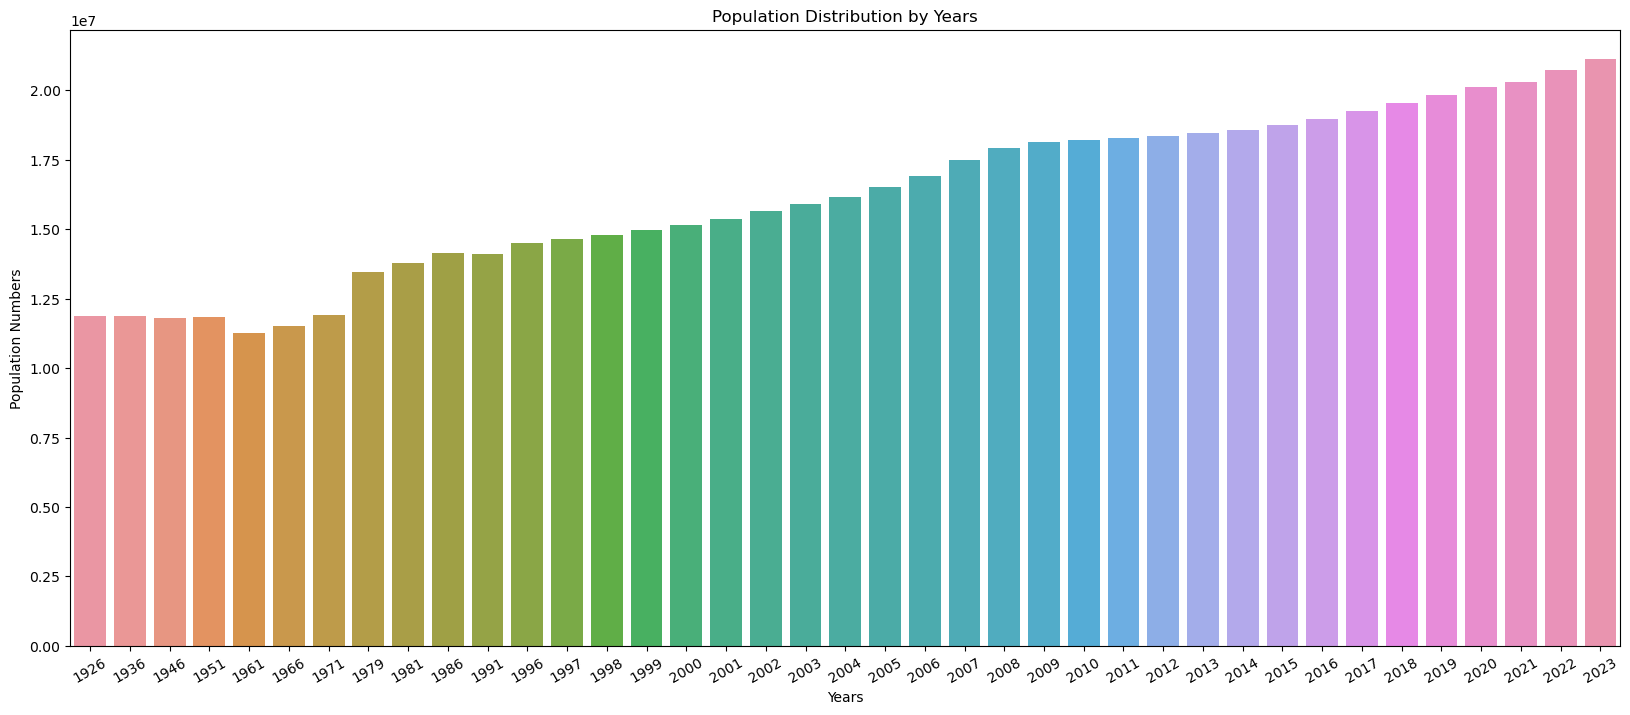

In [80]:
Years_Value = df.groupby('Year')['Value'].sum().reset_index()

Years_Value = Years_Value.sort_values('Value', ascending=False)

plt.figure(figsize=(20, 8))

sns.barplot(data=Years_Value, x='Year', y='Value')

plt.title('Population Distribution by Years')
plt.xlabel('Years')
plt.ylabel('Population Numbers')

plt.xticks(rotation=30)

plt.show()

#Calculate the number of population by year and store the result in a new data frame called county_units
# Sort the Years_Value data frame in descending order by total number of units
# I found the shape size by experimenting due to the size of the data set.
# Create a count chart to visualize data
# the title, x label and y label of the chart by applying plt.title() function, plt.xlabel() function,
# and use plt.ylabel() function 
# Rotate x-axis labels using xticks() for better readability
# View the drawing using the Show() function
# View the drawing using the Show() function

Visualized that the population has increased in Dublin over the years.To understand the years with the highest population, let's examine the 10 years with the highest population.

In [57]:
Population = df['Year'].value_counts()

In [58]:
top10 = Population.head(10).index.tolist()

In [59]:
top10

[1926, 2014, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2015]

In [61]:
top10_Years = df[df['Year'].isin(top10)]

# Filter the Value dataframe by the first 10 years by applying the .isin() method

In [62]:
top10_Years.groupby('Year')['Value'].sum().sort_values(ascending=False)

Year
2015    18751148
2014    18581760
2013    18458676
2012    18374788
2011    18299552
2010    18219052
2009    18133580
2008    17940280
2007    17503368
1926    11887968
Name: Value, dtype: int64

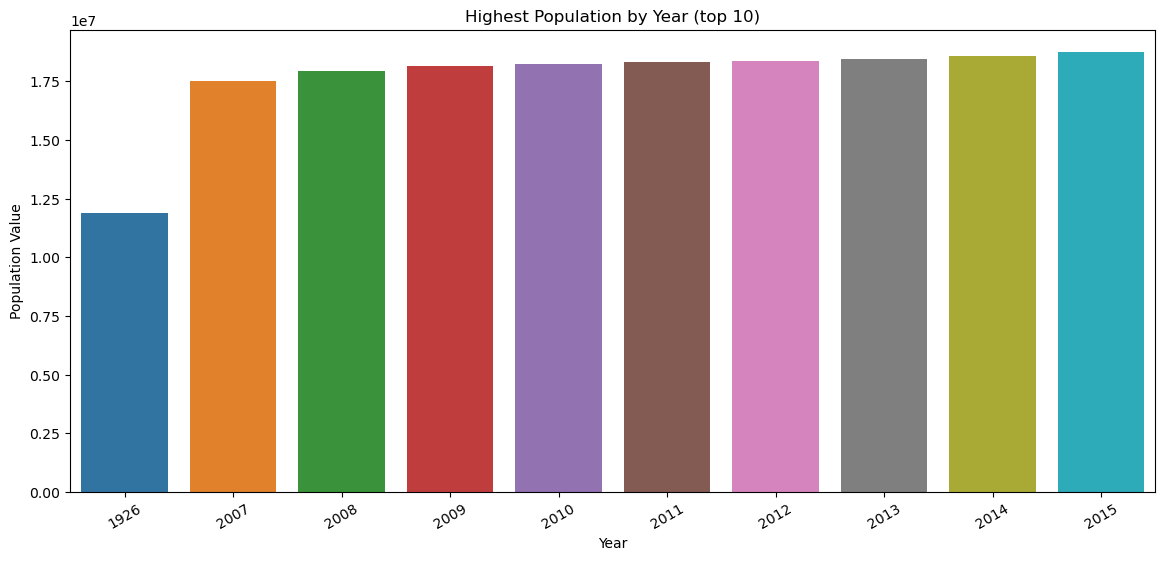

In [79]:
top10_Years_Value = top10_Years.groupby('Year')['Value'].sum().reset_index()

top10_Years_Value = top10_Years_Value.sort_values('Value', ascending=False)

plt.figure(figsize=(14, 6))

sns.barplot(x='Year', y='Value', data = top10_Years_Value)

plt.title('Highest Population by Year (top 10)')
plt.xlabel('Year')
plt.ylabel('Population Value')

plt.xticks(rotation=30)

plt.show()

# Calculate the number of population units and store the result in a new data frame called top10_Years_Value 
# Sort the top10_Years_Value  data frame in descending order by total number of units
# We find the shape size by trying
# Create a count chart to visualize high population years
# Set the title, x label and y label of the chart by applying plt.title() function, plt.xlabel() function,
# and use plt.ylabel() function
# Rotate x-axis labels using xticks() for better readability
# View the drawing using the Show() function

There is no significant difference between the number of high population units in Dublin City and the number of units in the other top 10 population values. Only a lower value was observed in the first year compared to the other years.

We can also express the relevant observation as follows; except for the first observation, there is no difference between the other observations.

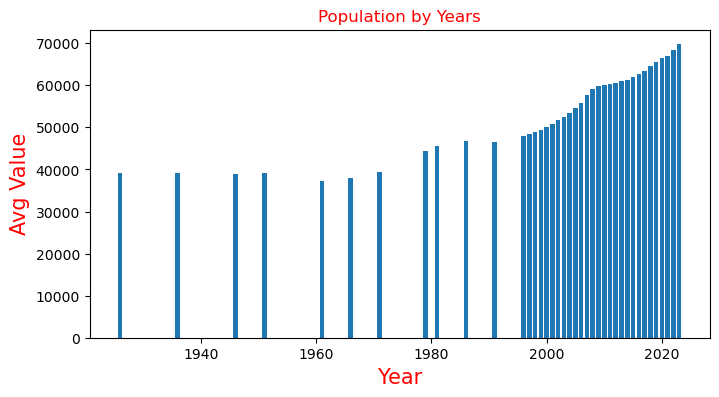

In [89]:
plt.figure(figsize=(8, 4))
plt.bar(df.groupby('Year')['Year'].count().index,df.groupby('Year')['Value'].mean())
plt.xlabel("Year",fontsize=15, color='Red')
plt.ylabel("Avg Value",fontsize=15,color='Red')
plt.title("Population by Years",color='Red')
plt.show()


# Create a histogram plot using Seaborn
# the figure size to (8,4) inches by applying the plt.figure() function with the figsize attribute
# Display the plot by calling the the plt.show() function, sns.histplot() function from Seaborn, specify 'Value' as the dataframe containing the data to be plotted,specify 
# 'Year' as the column name in the dataframe to be plotted on the x-axis,
# defines the number of bins (15) to use in the histogram plot. The number of bins have been choses based on different attempts
# with the aim of  of providing sufficient detail to capture important patterns in the data while maintaining visual clarity
# and avoiding excessive noise or oversimplification.

From this histogram, we can observe that the majority of projects (almost 70000) approved from after 2020 units. This is the most common range of units within the dataset. The histogram appears skewed to the right, and this should be taken into account for future possible analysis.

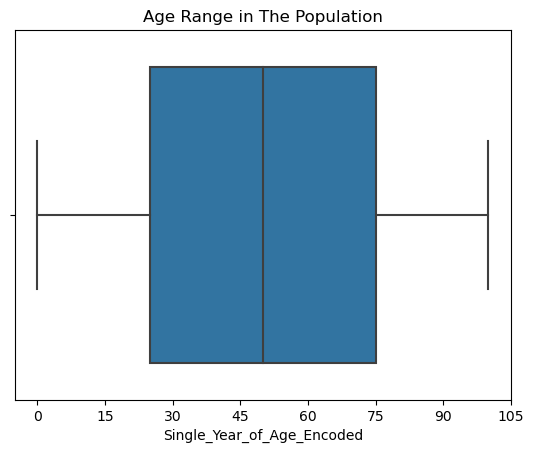

In [28]:
import matplotlib.ticker as ticker

sns.boxplot(data=df, x='Single_Year_of_Age_Encoded')

plt.title('Age Range in The Population')

# Import the `ticker` module from the `matplotlib` library
# Apply sns.boxplot to visualize the age range of the population by year. Use the 'Single_Year_of_Age_Encoded' dataframe 
# as the data source and specify 'Age Range in The Population' as the column by which to group the data.
# Set the title of the box plot using the plt.title() function
# Convert the years in the y-axis to integers for better visualization
# Apply the .gca() method to get the current axes and apply the xaxis attribute set the x-axis tick locator to display
# integers only

plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Call the plt.show() function to display the box plot

plt.show()

In this box plot, we can see that the majority of ages are between the ages of after 25 and 75. There is no contrary observation.

# LINNEAR REGRESSION

In [ ]:
Year = df.loc[df['Year'] != 0]

# Filter the dataframe to select rows where the 'Year' column is not equal to 0 and store the result in a 
# new dataframe called 'Year'. This is done because missing values in all the years columns had been previously replaced by
# the value '0'.

Examine whether there is a correlation between years and population with a single independent variable. When all variables are examined, it should be checked whether the population increases or decreases according to years.

In [ ]:
Year.head()

In [ ]:
Year_of_Values = Year.groupby('Year').agg({'Value': 'sum', 'Sex_Encoded': 'count'})

Year_of_Values  = Year_of_Values .rename(columns={'Year': 'Year', 'Value': 'Years_of_Population'})

Year_of_Values.reset_index(inplace=True)

Year_of_Values

# Group the DataFrame by 'Year' and aggregate the sum of 'Value' and count of rows
# Rename the columns for clarity by applying the .rename() function
# Apply the .reset_index() method with the inplace=True attribute to reset the index to make 'Years_of_Population' a regular 
#column and make the change permanent

In [ ]:
Values_Of_Years = Year[['Value','Year']]

# Years are readjusted according to the data set 'Values_Of_Years'


In [ ]:
plt.figure(figsize=(15,5))

c= Values_Of_Years.corr()

sns.heatmap(c,annot=True)

c

# We draw a correlation heat map to see the correlation coefficient between the number of Value and Year.
# To determine the dimensions of the correlation heat map, call the plt.figure() function. I determine the dimensions by trying
# We define variable 'c' which will be a table containing correlation coefficients
# annot=True so the correlation coefficients appear in the heat map
# print 'c' to show a table with correlation coefficients


It can be observed from this heatmap that there is a very weak and close-to-zero correlation between number of Value and Year. Therefore, there is almost no linear relationship between the two variables.

In this box plot, we can see that the majority of ages are between the ages of after 25 and 75. There is no contrary observation.

In [ ]:
sns.scatterplot(x=df['Year'], y=df['Value'], hue=df['Sex_Encoded'] );

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

# Import libraries

In [ ]:
correlation = df.corr()
print(correlation)

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(), annot = True, fmt = '.2f', linewidths = 2);

In [ ]:
plt.figure(figsize=(18,14))
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5);

It can be observed from this heatmap that there is a very weak and close-to-zero correlation between number of units and years. Therefore, there is almost no linear relationship between the four variables.

## Decision tree regression

In [ ]:
warnings.simplefilter(action='ignore', category=Warning)

In [ ]:
df.describe().T

In [ ]:
X = df.drop('Value', axis=1)
y = df[["Value"]]

In [ ]:
# Hold out yöntemi uygulayıp veri setini eğitim ve test olarak ikiye ayırıyoruz.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345)

In [ ]:
X_test.shape

In [ ]:
X_train.shape

In [ ]:
reg_model = LinearRegression().fit(X_train, y_train)

In [ ]:
# sabit (b - bias)
reg_model.intercept_

In [ ]:
# coefficients (w - weights)
reg_model.coef_

In [ ]:
# Train RMSE
y_pred = reg_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

In [ ]:
# TRAIN RKARE
reg_model.score(X_train, y_train)

In [ ]:
# Test RMSE
y_pred = reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

# PREDICTION

In [ ]:
np.mean(np.sqrt(-cross_val_score(reg_model,X,y,cv=10,scoring="neg_mean_squared_error")))

In [ ]:
np.mean(np.sqrt(-cross_val_score(reg_model,X,y,cv=5,scoring="neg_mean_squared_error")))

# RANDOM FOREST

In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve

In [ ]:
rf_model = RandomForestClassifier(random_state=45)
rf_model.get_params()

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [ ]:
warnings.simplefilter(action='ignore', category=Warning)

In [ ]:
rf_model = RandomForestClassifier(random_state=45)
rf_model.get_params()

In [ ]:
cv_results = cross_validate(rf_model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])

##  Data Preprocessing

# KNN

In [ ]:
print(df.groupby('Year').size())

In [ ]:
print(df.groupby('Sex_Encoded').size())

In [ ]:
neighbors = np.arange(1, 9)                  # number of neighbors
train_accuracy = np.zeros(len(neighbors))    # Declare and initialise the matrix
test_accuracy = np.zeros(len(neighbors)) 

In [ ]:
for i,k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 9
    knn = KNeighborsClassifier(n_neighbors = k)           # Initialise an object knn using KNeighborsClassifier method

    #Fit the model
    knn.fit(train_data, train_label)                      # Call fit method to implement the ML KNeighborsClassifier model

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_data, train_label)   # Save the score value in the train_accuracy array

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(test_data, test_label)      # Save the score value in the train_accuracy array

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)


In [ ]:
y = df["Value"]
X = df.drop(["Value"], axis=1)

In [ ]:
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
X = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
knn_model = KNeighborsClassifier().fit(X, y)

In [ ]:
random_user = X.sample(1, random_state=245)

In [ ]:
knn_model.predict(random_user)

# MODEL BASARISINI DEGERLENDIRME

In [ ]:
# Confusion matrix için y_pred:
y_pred = knn_model.predict(X)

In [ ]:
# AUC için y_prob:
y_prob = knn_model.predict_proba(X)[:, 1]

In [ ]:
print(classification_report(y, y_pred))

In [ ]:
cv_results = cross_validate(knn_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

In [ ]:
cv_results['test_accuracy'].mean()

In [ ]:
knn_model.get_params()

In [ ]:
knn_model = KNeighborsClassifier()

In [ ]:
knn_params = {"n_neighbors": range(2, 100)}

In [ ]:
knn_gs_best = GridSearchCV(knn_model, knn_params, cv=5, n_jobs=-1, verbose=1).fit(X, y)

In [ ]:
knn_gs_best.best_params_

In [ ]:
knn_final = knn_model.set_params(**knn_gs_best.best_params_).fit(X, y)

In [ ]:
cv_results = cross_validate(knn_final,
                            X,
                            y,
                            cv=5,
                            scoring=["accuracy"])

In [ ]:
cv_results['test_accuracy'].mean()

In [ ]:
# basariyi nasil arttirabilirim, ilgili algoritma icin optimizasyin yapildi

In [ ]:
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's': 9}, ci=False, color="r")

g.set_title(f"Model Denklemi: Value = {round(reg_model.intercept_[0], 2)} + Year *{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Year")
g.set_xlabel("Value")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

In [ ]:
y_pred = reg_model.predict(X)
mean_squared_error(y, y_pred)

In [ ]:
y.mean()
y.std()

In [ ]:
np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
mean_absolute_error(y, y_pred)

In [ ]:
mean_absolute_error(y, y_pred)

In [ ]:
reg_model.score(X, y)

In [ ]:
# Import the `ticker` module from the `matplotlib` library

import matplotlib.ticker as ticker

# Apply sns.boxplot to visualise the population by ages.

# Use the 'years' dataframe as the data source and specify 'Single_Year_of_Age_Encoded' as the column to group the data by and change the colour

sns.boxplot(data=df, x='Single_Year_of_Age_Encoded', color='Deeppink')

# Set the title of the box plot using the plt.title() function

plt.title('Population_by_Age')

# Convert the years in the y-axis to integers for better visualization

# Apply the .gca() method to get the current axes and apply the xaxis attribute set the x-axis tick locator to display
# integers only

plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Call the plt.show() function to display the box plot

plt.show()

In this boxplot, we can say that the age majority is 25-75.

In [ ]:
train_validation = df.sample(frac = 0.8, random_state = 200)
test = df.drop(train_validation.index)
len(test)

We allocated 80% of the data as the training and validation set, and the remaining 20% as the test set. I stated what percentage I would divide the amount of “.example” by the accumulation of “frak”. The “random_state” command, like most commands, enables the division of progress by setting the “seed” part. The “.drop” cut in the second line throws the remaining data from the original data, except the parts we reserved for train and verification, to the test set.

In [ ]:
len(train_validation)

In [ ]:
len(test)

In the last 2 lines, we look at the line numbers in order to verify the operation. The number of rows of the train and validation set almost should be equal to 4 times the number of rows of the test set.

In [ ]:
from sklearn.linear_model import LinearRegression
y = train_validation["Value"]
x = train_validation.drop("Value", axis = 1)
lr = LinearRegression()
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(estimator = lr,
k_features = (1, 3),forward = True,floating = False,cv = 0)
sfs_fit = sfs.fit(X = x.values, y = y.values)
sfs_fit.subsets_

First of all, I import LinearRegression from the sklearn.linear_model module with the "import" command. The commands we will use are in this library. Then, I introduce to the program what the dependent and independent variables are for feature selection. Since "y", the dependent variable, will be the population value, I filter the number rate from the train_validation set. I assign everything else to the “x” object as estimators, that is, independent variables, by giving the necessary arguments to the “.drop” command. In the next line, I assign the method I will use for estimation to the “lr” object. Since I will be selecting features using Linear Regression, I perform this process with the “LinearRegression()” command. In the next step, I create the method for selecting the feature and assign it to the "sfs" object. The “SFS” command here is the abbreviation of “Sequential Feature Selection”, that is, the method that selects features in an incremental manner. After giving the "lr" object as an estimator in the function's arguments, I tell it to choose the best feature combination in a certain range in the "k_features" argument. Since I have 3 columns, I want it to find the best combination of variables starting from 1 to 3. The “Forward” argument being “True” means that the selection should be forward-looking, that is, by adding the features sequentially. The “Floating” argument adds an intermediate step to each step and continues the algorithm by removing variables that reduce performance. This argument was selected as “False”. Finally, when I said “cv = 0”, I stated that we did not want any cross-validation. I did not use the cross-validation method at this stage. This will allow us to see the difference clearly. After determining this method, we started the process with the “sfs.fit” command. In the last line of the code block, I used the “.subsets_” command to see the models at each step.

{1: {'feature_idx': (2,),
  'cv_scores': array([0.01508134]),
  'avg_score': 0.015081342429616673
  
I only took the first line of the result of the command, this will be enough for us. In the first step, train_validation was the second variable that minimized the average error in the set. It can be seen in the “avg_score” section that the average score for this variable is around 0.015081.

In [ ]:
from scipy.stats.mstats import winsorize
import scipy.stats as stats
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)

from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing

## DECISION TREE

In [ ]:
# Use only 'Year' and 'Value' features into X
X = df.iloc[:, [1, 0]].values

# Store the 'Sex' feature into 'y'
y = df.iloc[:, 2].values

# Display X and y 
# X, y

In [ ]:
# Load the library 'sklearn.model_selection'
from sklearn.model_selection import train_test_split

# Split the data set into Training and Testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Display the Number of rows and columns before (X, y) and after Splitting (X_train, X_test, y_train, y_test)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# Load the library 'sklearn.preprocessing'
from sklearn.preprocessing import StandardScaler

# Create and initialise an object by calling a method 'StandardScaler()'
sc = StandardScaler()

# Convert the X_train and X_test into standised format
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Display the trandofrmed values
# X_train, X_test

In [ ]:
# Load the library 'sklearn.tree'
from sklearn.tree import DecisionTreeClassifier

# Create and initialise a DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 3, random_state = 0)

# Train the classifier by calling a method 'fit()'
classifier.fit(X_train, y_train)

In [ ]:
# Calculate the predicted vlaue by calling a method predict()
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn import metrics                           
# Import scikit-learn metrics module for accuracy calculation
import warnings
warnings.filterwarnings('ignore') 
# We can suppress the warnings

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(classifier.fit(X_train, y_train)) 

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('white', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Value')
plt.ylabel('Age')
plt.legend()
plt.show()

In [ ]:
correlation = df.corr()
print(correlation)

In [ ]:
plt.figure(figsize=(18,14))
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5);

In [ ]:
scaler = StandardScaler()

df_scale = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [ ]:
df_scale.head()

In [ ]:
y = df['Value']
X = df_scale.drop(['Value'],axis=1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

In [ ]:
lrm = LinearRegression()
lrm.fit(X_train, Y_train) #fit an OLS model

In [ ]:
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)  #making predictions

In [ ]:
print("R-squared of the model in training set is: {}".format(lrm.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))

## RIDGE

In [ ]:
# Using GridSearch for parameter optimization
ridgeregr = GridSearchCV(Ridge(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1]
                    }, verbose=1)

ridgeregr.fit(X_train, Y_train)

ridge = ridgeregr.best_estimator_

In [ ]:
# Making predictions here
y_preds_train = ridge.predict(X_train)
y_preds_test_ridge = ridge.predict(X_test)

print("R-squared of the model in training set is: {}".format(ridge.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(Y_test, y_preds_test_ridge)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test_ridge) / Y_test)) * 100))

## LASSO

In [ ]:
# using GridSearch for parameter optimization
lassoregr = GridSearchCV(Lasso(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1]
                    }, verbose=1)

lassoregr.fit(X_train, Y_train)

lasso = lassoregr.best_estimator_

In [ ]:
# We are making predictions here
y_preds_train = lasso.predict(X_train)
y_preds_test_lasso = lasso.predict(X_test)

print("R-squared of the model in training set is: {}".format(lasso.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test_lasso)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test_lasso) / Y_test)) * 100))

# DATA VISULATION

In [ ]:
sns.pairplot(df)

In [ ]:
fig = plt.figure(figsize = (16,9))
sns.barplot(x ='Year', y = 'Value', palette = 'mako', data = df)

In [ ]:
fig = plt.figure(figsize = (16,9))
sns.lineplot(x ='Year', y = 'Value', data = df)

# STATISTICS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from empiricaldist import Pmf, Cdf
from matplotlib.ticker import PercentFormatter

In [ ]:
def label_graph(ticksfont, x_label, y_label, title_label, fontsize):
    plt.xticks(fontsize=ticksfont)
    plt.yticks(fontsize=ticksfont)
    plt.xlabel(x_label, fontsize=fontsize)
    plt.ylabel(y_label, fontsize=fontsize)
    plt.title(title_label, fontsize=fontsize)